# Car Number Plate Detection

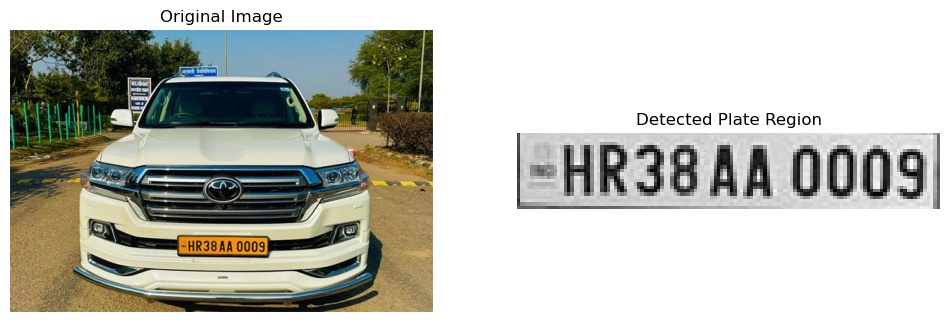

Detected Number Plate Text: -HR38 AA 0009)


In [12]:
import cv2
import pytesseract
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Path to your input image
image_path = '/mnt/data/abhishek/data2/Ducat Machine Learning/dataset/car.jpg'

def detect_number_plate(image_path):
    """
    Detects and reads the number plate from an image using Tesseract OCR.
    """
    # Load the image
    original_image = cv2.imread(image_path)
    if original_image is None:
        print(f"Error: Could not open or find the image at {image_path}")
        return None, None, None

    # Convert to grayscale
    gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur and edge detection
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    edged_image = cv2.Canny(blurred_image, 30, 150)

    # Find contours
    contours, _ = cv2.findContours(edged_image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

    number_plate_contour = None
    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)
        if len(approx) == 4:
            number_plate_contour = approx
            break

    processed_image = gray_image
    detected_text = None

    if number_plate_contour is not None:
        x, y, w, h = cv2.boundingRect(number_plate_contour)
        cropped_plate = gray_image[y:y + h, x:x + w]
        processed_image = cropped_plate

        # OCR
        try:
            detected_text = pytesseract.image_to_string(
                Image.fromarray(cropped_plate),
                config='--psm 8'
            ).strip()
        except pytesseract.TesseractNotFoundError:
            print("Tesseract is not installed or not properly linked.")
            return original_image, processed_image, None

    return original_image, processed_image, detected_text

# Run the function
original_img, processed_img, text = detect_number_plate(image_path)

# Display images
if original_img is not None:
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    if processed_img is not None:
        plt.imshow(processed_img, cmap='gray')
        plt.title("Detected Plate Region")
    else:
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        plt.title("No Plate Detected")
    plt.axis('off')

    plt.show()

    if text:
        print(f"Detected Number Plate Text: {text}")
    else:
        print("No number plate text detected.")


# Car Number Plate Detection using OpenCV and Tesseract OCR

## Aim

The aim of this project is to develop a system that can automatically detect and recognize the text on a vehicle's number plate from an image. This involves using image processing techniques to locate the number plate region within the image and then employing Optical Character Recognition (OCR) to extract the alphanumeric characters from the detected plate.

## Steps

The process involves the following steps:

1.  **Import Libraries:** Import necessary libraries such as `cv2` (OpenCV) for image processing, `pytesseract` for OCR, `PIL` (Pillow) for image manipulation with Tesseract, `numpy` for numerical operations, and `matplotlib.pyplot` for displaying images.
    ```python
    import cv2
    import pytesseract
    from PIL import Image
    import numpy as np
    import matplotlib.pyplot as plt
    ```


2.  **Define Image Path:** Provide the path to the input image containing the vehicle.
    ```python
    # Path to your input image
    image_path = '/mnt/data/abhishek/data2/Ducat Machine Learning/dataset/car2.jpg'
    ```

3.  **`detect_number_plate` Function:** This function encapsulates the core logic for number plate detection and recognition.
    * **Load Image:** Read the image from the specified path using `cv2.imread()`. Handle potential errors if the image cannot be opened or found.
    * **Convert to Grayscale:** Convert the color image to grayscale using `cv2.cvtColor()` as grayscale images simplify subsequent processing.
    * **Apply Gaussian Blur:** Apply Gaussian blur using `cv2.GaussianBlur()` to reduce noise and smooth the image, which can improve edge detection.
    * **Edge Detection:** Use the Canny edge detection algorithm (`cv2.Canny()`) to identify potential boundaries of objects, including the number plate.
    * **Find Contours:** Find all contours in the edged image using `cv2.findContours()`. Contours represent the boundaries of shapes in the image.
    * **Filter and Sort Contours:** Sort the detected contours by their area in descending order and keep only the top 10 largest contours. This helps in focusing on potential number plate regions.
    * **Approximate Number Plate Contour:** Iterate through the top contours and approximate each contour with a polygon using `cv2.approxPolyDP()`. A number plate is typically rectangular (4 sides). If a contour is approximated to a quadrilateral, it is considered a potential number plate.
    * **Crop the Number Plate Region:** If a number plate contour is found, extract the region of interest (ROI) corresponding to the number plate from the grayscale image using the bounding box coordinates obtained from the contour.
    * **Perform OCR:** Use `pytesseract.image_to_string()` to perform Optical Character Recognition on the cropped number plate image. Configure Tesseract to assume a sparse text layout (`--psm 8`) which is often suitable for number plates. Handle potential `TesseractNotFoundError` if Tesseract is not installed or configured correctly.
    * **Return Results:** The function returns the original image, the processed (cropped plate) image, and the detected text (if any).

4.  **Run the Function:** Call the `detect_number_plate()` function with the image path to perform the detection and recognition.
    ```python
    # Run the function
    original_img, processed_img, text = detect_number_plate(image_path)
    ```

5.  **Display Images and Detected Text:**
    * Use `matplotlib.pyplot` to display the original image and the detected number plate region (or a message if no plate was detected).
    * Print the detected number plate text to the console if OCR was successful. Otherwise, print a message indicating that no text was detected.

## Conclusion

This project demonstrates a basic implementation of number plate detection and recognition using computer vision techniques. By employing image preprocessing steps like grayscale conversion, blurring, and edge detection, potential number plate regions are identified. Subsequently, contour analysis helps in isolating the rectangular shape of the number plate. Finally, Tesseract OCR is used to extract the text from the detected plate region.


# PROJECT Step by Step

In [21]:
# Import Required Libraries
import cv2
import pytesseract
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

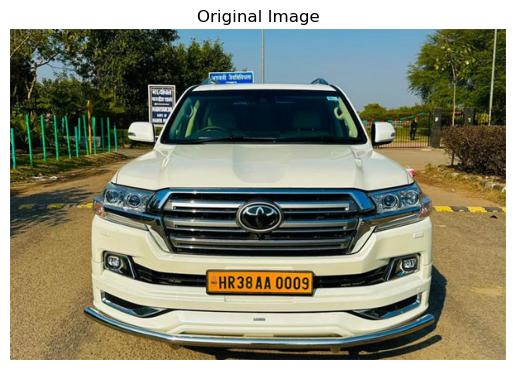

In [23]:
# Image Path and load the image

image_path = '/mnt/data/abhishek/data2/Ducat Machine Learning/dataset/car.jpg'

# Load the image
original_image = cv2.imread(image_path)
if original_image is None:
    print(f"Error: Could not open or find the image at {image_path}")
else:
    # Show the original image
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis('off')
    plt.show()


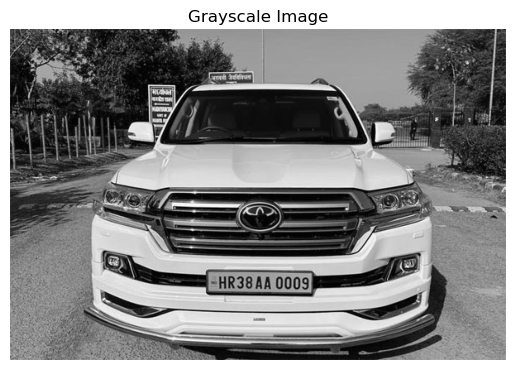

In [24]:
# Convert to Grayscale
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Show grayscale image
plt.imshow(gray_image, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()


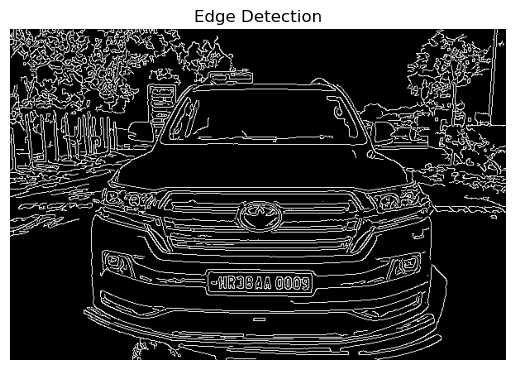

In [25]:
# Apply Gaussian Blur and Edge Detection
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
edged_image = cv2.Canny(blurred_image, 30, 150)

# Show edge-detected image
plt.imshow(edged_image, cmap='gray')
plt.title("Edge Detection")
plt.axis('off')
plt.show()


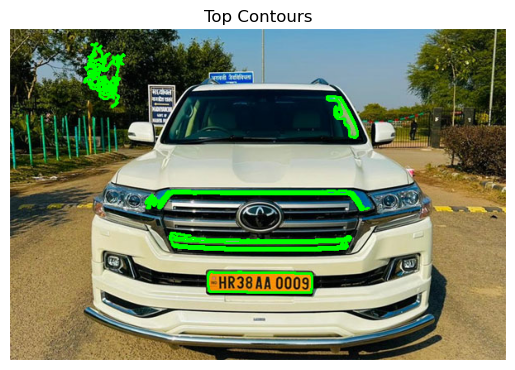

In [26]:
# Find Contours
contours, _ = cv2.findContours(edged_image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

# Draw top contours on a copy of the original
contour_image = original_image.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title("Top Contours")
plt.axis('off')
plt.show()


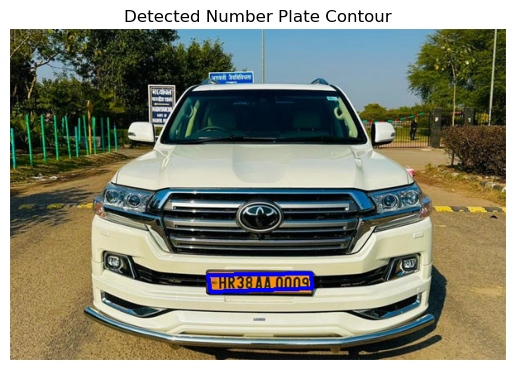

In [27]:
# Detect Number Plate Contour
number_plate_contour = None
for contour in contours:
    perimeter = cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)
    if len(approx) == 4:
        number_plate_contour = approx
        break

# Draw detected contour if found
contour_result_image = original_image.copy()
if number_plate_contour is not None:
    cv2.drawContours(contour_result_image, [number_plate_contour], -1, (255, 0, 0), 3)

plt.imshow(cv2.cvtColor(contour_result_image, cv2.COLOR_BGR2RGB))
plt.title("Detected Number Plate Contour")
plt.axis('off')
plt.show()


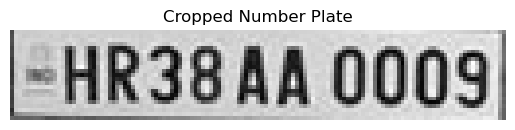

In [28]:
# Crop and Prepare the Number Plate Region
processed_image = gray_image
if number_plate_contour is not None:
    x, y, w, h = cv2.boundingRect(number_plate_contour)
    cropped_plate = gray_image[y:y + h, x:x + w]
    processed_image = cropped_plate

    plt.imshow(processed_image, cmap='gray')
    plt.title("Cropped Number Plate")
    plt.axis('off')
    plt.show()
else:
    print("Number plate contour not found.")


In [29]:
# Perform OCR on the Cropped Plate
detected_text = None

if number_plate_contour is not None:
    try:
        detected_text = pytesseract.image_to_string(
            Image.fromarray(processed_image),
            config='--psm 8'
        ).strip()
    except pytesseract.TesseractNotFoundError:
        print("Tesseract is not installed or not properly linked.")

if detected_text:
    print(f"Detected Number Plate Text: {detected_text}")
else:
    print("No number plate text detected.")


Detected Number Plate Text: -HR38 AA 0009)
